## Data Cleaning


***Cleaning data is a process of***

<li> Preparing data for analsis because the data almost never comes in clean.
<li>Diagnosing data for problems 

***Common problems that exist in data :***
<li> Inconsistent column names 
<li> Missing Data
<li> Outliers
<li> Duplicate Rows
<li> Untidy Datasets
<li> Processing columns before they can be used for data analysis
<li> Column types can signal the presence of unexpected data values.

 *** In this assignment, we are going to deal with the prices of oil throughout an year. *** 


In [84]:
import numpy as np
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
path = "C:/Users/viki4/Desktop/Data Science/Oil_Prices1.csv"
data = pd.read_csv(path)
data.head()

,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
0,10/10/2017,49.55,51.06,49.54,50.94,1.34,50.92,641402.0,407051.0
1,10/9/2017,49.25,49.79,49.13,49.56,0.29,49.58,487932.0,453631.0
2,10/6/2017,50.75,50.82,49.10,49.25,1.50,49.29,720752.0,495395.0
3,10/5/2017,49.88,51.22,49.85,50.75,0.81,50.79,649264.0,511107.0
4,10/4/2017,50.16,50.67,49.76,49.90,0.44,49.98,596897.0,513316.0


## Explanation :
<li>The above code reads the "Oil_Prices1" csv from the directory.


In [85]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Change', 'Settle', 'Volume',
       'Previous Day Open Interest'],
      dtype='object')

## Explanation :
<li>The above bolck of code returns the Index of the columns of the dataframe. 

In [86]:
column_names={'Open':'Opening', 'Previous Day Open Interest':'Interest'}

data=data.rename(columns = column_names)
data.head()

,Date,Opening,High,Low,Last,Change,Settle,Volume,Interest
0,10/10/2017,49.55,51.06,49.54,50.94,1.34,50.92,641402.0,407051.0
1,10/9/2017,49.25,49.79,49.13,49.56,0.29,49.58,487932.0,453631.0
2,10/6/2017,50.75,50.82,49.10,49.25,1.50,49.29,720752.0,495395.0
3,10/5/2017,49.88,51.22,49.85,50.75,0.81,50.79,649264.0,511107.0
4,10/4/2017,50.16,50.67,49.76,49.90,0.44,49.98,596897.0,513316.0


## Explanation :
<li>The above block of code renames the column "Previous Day Open Interest" to "Interest" for better readability.

In [183]:
new_data=data.fillna('0.00')
new_data.head()

,Date,Opening,High,Low,Last,Change,Settle,Volume,Interest
0,10/10/2017,49.55,51.06,49.54,50.94,1.34,50.92,641402,407051
1,10/9/2017,49.25,49.79,49.13,49.56,0.29,49.58,487932,453631
2,10/6/2017,50.75,50.82,49.1,49.25,1.5,49.29,720752,495395
3,10/5/2017,49.88,51.22,49.85,50.75,0.81,50.79,649264,511107
4,10/4/2017,50.16,50.67,49.76,49.9,0.44,49.98,596897,513316


## Explanation :
<li>The above block of code fills all tha NaN values in the dataset with "0.00", assigns it to a new dataframe "new_data" and displays the new dataframe.


In [88]:
del new_data['Settle']
new_data.head()

,Date,Opening,High,Low,Last,Change,Volume,Interest
0,10/10/2017,49.55,51.06,49.54,50.94,1.34,641402,407051
1,10/9/2017,49.25,49.79,49.13,49.56,0.29,487932,453631
2,10/6/2017,50.75,50.82,49.1,49.25,1.5,720752,495395
3,10/5/2017,49.88,51.22,49.85,50.75,0.81,649264,511107
4,10/4/2017,50.16,50.67,49.76,49.9,0.44,596897,513316


## Explanation :
<li>The above block of code drops the column "Settle" from the new dataframe "new_data".

In [96]:
data_melt = pd.melt(data, id_vars=['Date'],value_vars=['Opening','Last'])
data_melt.head()

,Date,variable,value
0,10/10/2017,Opening,49.55
1,10/9/2017,Opening,49.25
2,10/6/2017,Opening,50.75
3,10/5/2017,Opening,49.88
4,10/4/2017,Opening,50.16


## Explanation :
<li>The melt() function unpivots a dataframe from wide format to a long format.
<li>Similar to the pivot tables, melt() is used to transform data. Here, the melt() function takes three parameters. First is the dataframe. Second is the id_vars. ID variables are basically the things to be represented on the x-axis. ie. the columns that are to be kept intact and doesn't need to be transformed.   
<li>value_vars are the columns that we need to unpivot. If nothing is specified within the value_vars, by default it takes all the columns. Here, the columns to unpivot are the "Opening" and "Last".
<li>data_melt.head() returns first few rows of the dataframe "data_melt".

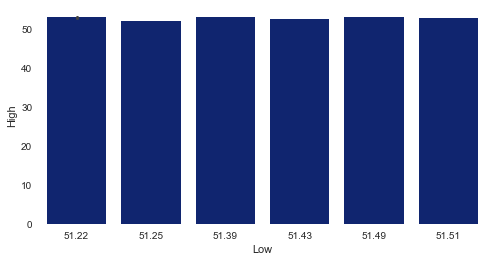

In [244]:
f,ax = plt.subplots(figsize=(8,4))

sns.set_color_codes("dark")
sns.barplot(x="Low", y="High", data=data.query('51.10<Low<51.55'),
             color="b")

ax.set(ylabel="High",
       xlabel="Low")
sns.despine(left=True, bottom=True)
plt.show()

## Explanation :
<li>The above block of code visualizes the data in the dataset "data" and creates a Barplot of the data.
<li>Here, the graph represents the total Lowest price of oil on the x-axis and the Highest price on the y-axis.
<li>The line f,ax = plt.subplots(figsize=(8,4)) sets the dimensions of the subplot to 8x4.
<li>Here, data=data.query() takes the range of the data to be displayed. 
<li>ax.set() function is used to set the labels for the axes.

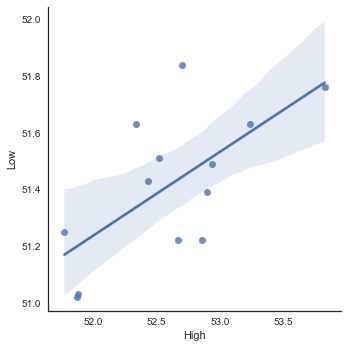

In [91]:
g = sns.lmplot(x="High", y="Low",truncate=True, size=5, data=data.query('51<=Low<=52'))
g.set_axis_labels("High", "Low")
plt.show()

## Explanation : 
<li> The above block of code creates a scatter plot of the High v/s the lowest price of oil from the "data" dataset.
<li>The function sns.lmplot() is a combination of regplot() and FacetGrid.
<li>lmplot() takes the x-axis and y-axis parameters
<li>truncate is a boolean parameter. It is set to True so that the regression line should be bounded by the data limits.
<li>size=5 specified the height of the facet.
<li>data=data is the dataset.


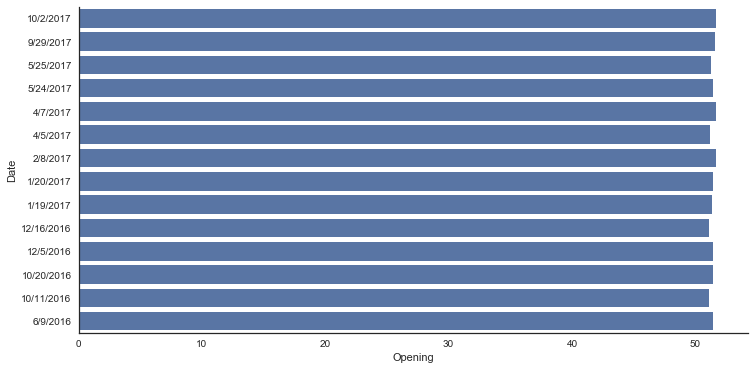

In [93]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='Opening', y='Date', data=data.query('51.10 <= Opening< = 51.80'),
            color='#4c72b0')
sns.despine()
plt.show()

## Explanation :
<li>The above block of code creates a barplot of the Opening price of oil on the particular dates from the dataframe "data".
<li>The x-axis represents the Opening price while the y-axis represents the Date.
<li>sns.despine() removes the left spines from the plot.

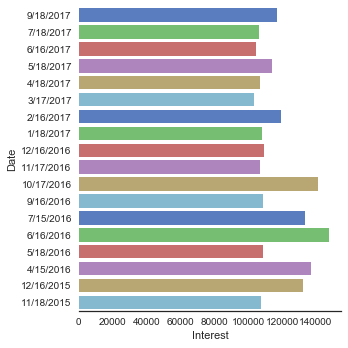

In [101]:
g = sns.factorplot(x="Interest", y="Date", data=data.query('100000<=Interest<=150000'),
                   size=5, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Date")
g.set_xlabels("Interest")
plt.show()

## Explanation :
<li>The above block of code creates a factorplot of kind bar.
<li>The graph represents the Interest on the price of oil on the particular dates of the year.
<li>The x-axis represents the Interest amount while the y-axis represents the Dates.
<li>sns.despine() removes the left spines from the plot.

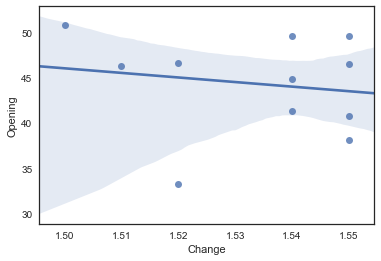

In [239]:
sns.regplot("Change", "Opening", data=data.query('1.50<=Change<=1.55'),
            truncate=False, dropna=True)

plt.show()

## Explanation :
<li>The above block of code creates a Regression plot of the data.
<li>The graph represents the change in price of oil with respect to the opening prices.
<li>The x-axis represents the Change in price while the y-axis represents the Opening prices.
<li>dropna=True drops the NaN values from the dataframe.
<li>plt.show() displays the plot.

## Explanation :
<li>The above block of code creates a box plot of the information from the dataset "data". 
<li>The graph represents the change in price of oil on the particular dates of the year.
<li>The x-axis represents the Change in price of oil while the y-axis represents the Date.
<li>ax.set() is used to set the axis labels.
<li>plt.show() displays the plot.

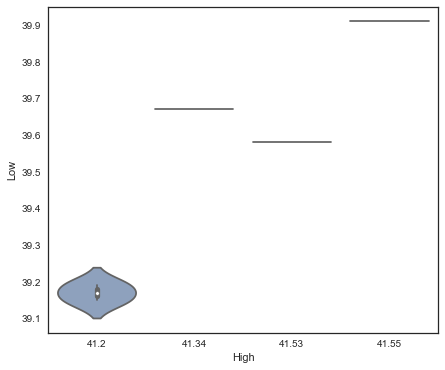

In [206]:
f, ax = plt.subplots(figsize=(7, 6))

sns.violinplot(x="High", y="Low", data=data.query('41.10<=High<41.60'),
            palette="vlag")
plt.show()

## Explanation :
<li>The above block of code creates a violin plot of the information from the dataset "data". 
<li>The graph represents the highest price of oil v/s the lowest price of oil in a particular year.
<li>The x-axis represents the Highest price of oil while the y-axis represents the Lowest price of oil.
<li>plt.show() displays the plot.

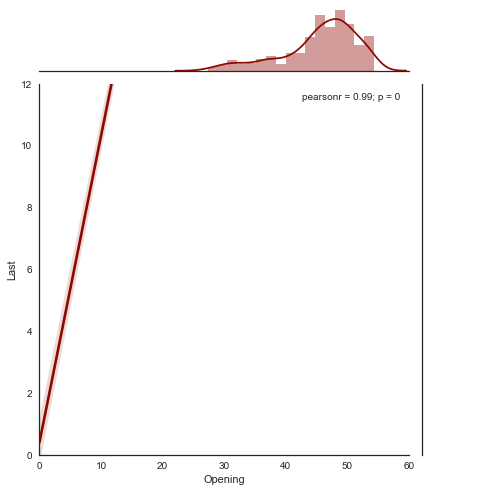

In [221]:
g = sns.jointplot("Opening", "Last", data=data, kind="reg",
                  xlim=(0, 60), ylim=(0, 12), color="r", size=7)
plt.show()

## Explanation :
<li>The above block of code creates a joint plot of the information from the dataset "data". 
<li>The graph represents the comparision of the Opening price of oil and its final price.
<li>The x-axis represents the Opening price of oil while the y-axis represents the final price i.e, the Last Price.
<li>The kind of the plot is regression.
<li>xlim and ylim are the axis limits to be set before plotting the graph.
<li>size=7 is the size of the figure.
<li>plt.show() displays the plot.

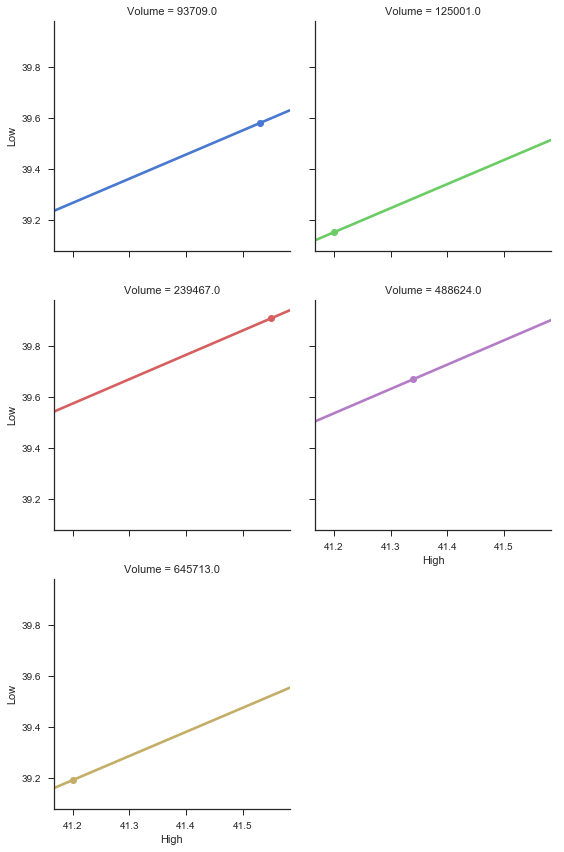

In [263]:
sns.set(style="ticks")
sns.lmplot(x="High", y="Low", col="Volume", hue="Volume", data=data.query('41.10<=High<=41.60'),
           col_wrap=2, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})
plt.show()

## Explanation :
<li>The above block of code creates a lmplot of the information from the dataset "data". 
<li>The graph represents the comparision of the Highest price of oil and its lowest price.
<li>The x-axis represents the High price of oil while the y-axis represents the low price.
<li>The palette represents colors to be used for the different levels of the hue variable.
<li>scatter_kws are the additional keyword arguments to be passed to plt.scatter and plt.plot.
<li>size=4 is the size of the figure.
<li>plt.show() displays the plot.

## References: 
https://seaborn.pydata.org/index.html